In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("bigdatamart_Train.csv")
Df=pd.read_csv("bigdatamart_Test.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

The dataframe has 8523 rows and 12 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are total 8523 rows and 12 columns in the dataframe.

The columns Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type and Outlet_Type are of object data type. Columns Item_Weight,Item_Visibility,Item_MRP and Item_Outlet_Sales are of float data type and Outlet_Establishment_Year column is interger data type.

The columns Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type and Outlet_Type has non-null 8523 data. But in Item_Weight and Outlet_Size null values are present there.

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight has 1463 null values and Outlet_Size has 2410 null values.

<AxesSubplot:>

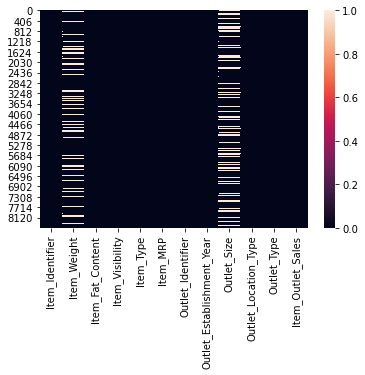

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The count of each columns are same except Item_weight, There is a large difference between 75th percentile and Max in Item_outlet_Sales.

In [8]:
#Dropping Outlet_Size and filling null values in Item_Weight with mean and replacing 0 in Item_visibility with mean.
df=df.drop('Outlet_Size',axis=1)
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now there is no null values.

In [11]:
columns=df.columns
columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

Data Visualization

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

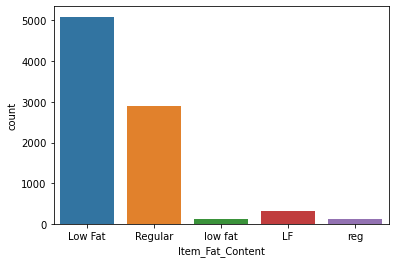

In [12]:
sns.countplot(df['Item_Fat_Content'])
df['Item_Fat_Content'].value_counts()

    In the dataset 5089 has low fat,2889 Regular ,316 LF fat,117 reg fat and 112 low fat. Only Low Fat and Regular is needed so need to replace low fat,LF and reg.

In [13]:
#Replacing low fat,LF and reg
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

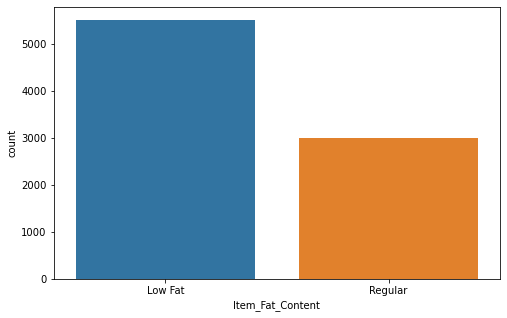

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(df['Item_Fat_Content'])
df['Item_Fat_Content'].value_counts()

5517 low fat items and 3006 regular items.

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

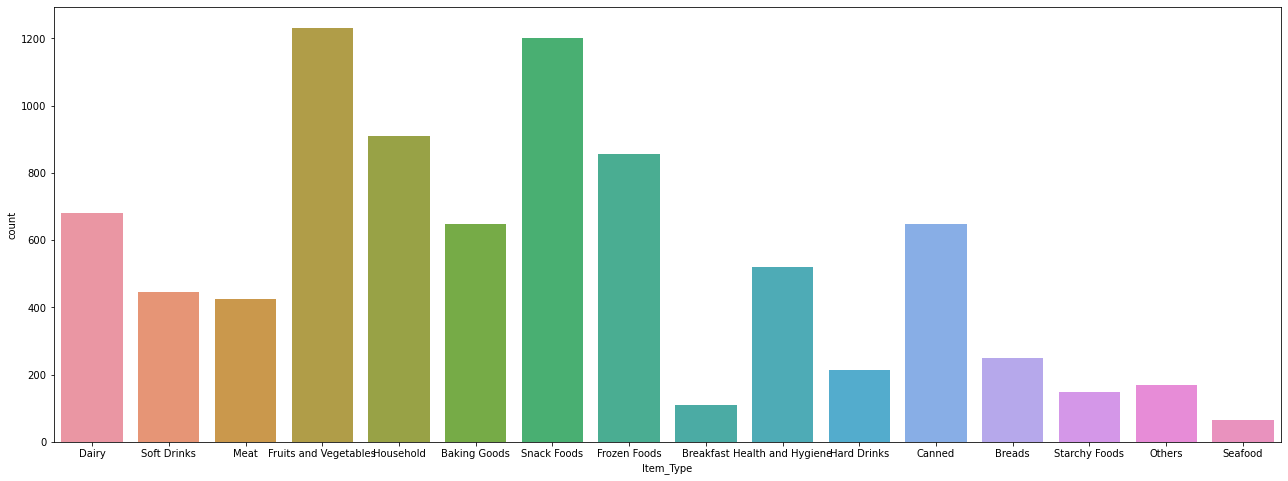

In [15]:
plt.figure(figsize=(22,8))
sns.countplot(df['Item_Type'])
df['Item_Type'].value_counts()

In the dataset therea are different type of items which are, Fruits and Vegetables-1232,Snack Foods-1200,Household-910,Frozen Foods-856,Dairy-682,Canned-649,Baking Goods-648,Health and Hygiene -520,Soft Drinks-445,Meat-425,Breads-251,Hard Drinks-214,Others-169,Starchy Foods-148,Breakfast-110,Seafood-64.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

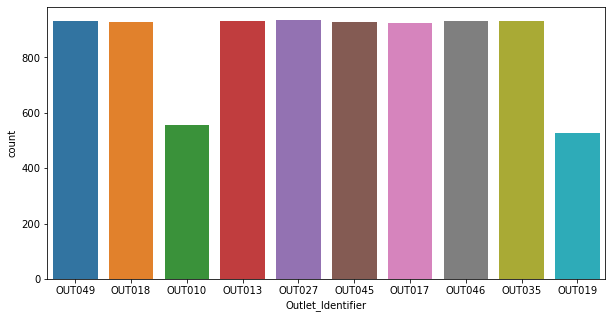

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Identifier'])
df['Outlet_Identifier'].value_counts()

There are 10 outlet identifiers in the dataset, OUT027-935,OUT013-932,OUT049-930,OUT046-930,OUT035-930,OUT045-929,OUT018-928,OUT017-926,OUT010-555,OUT019-528

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

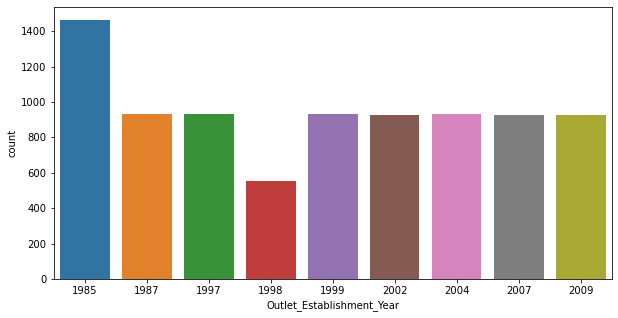

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year'].value_counts()

The outlet establishment year is given, In 1985- established 1463 outlets,1987established 932 outlets,in 2004 established 930 outlets,in 1997 established 930 outlets,in 1999 established 930 outlets,in 2002 established 929 outlets,in 2009 established 928 outlets,in 2007 established 926 outlets,in 1998 established 555 outlets.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

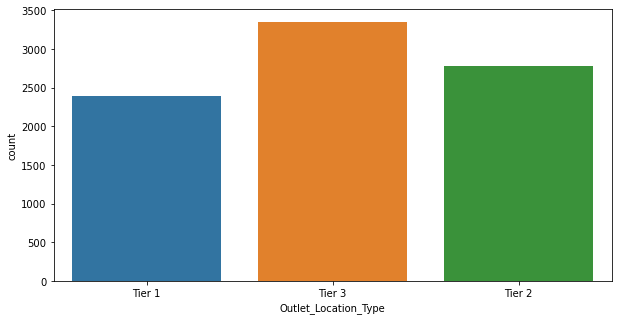

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Location_Type'])
df['Outlet_Location_Type'].value_counts()

The outlet location has 3 types in the dataset,TIer 1, Tier 2 and Tier 3. 3350 oulets in Tier 3, 2785 outlets in Tier2 and 2388 outlets in Tier 1.

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

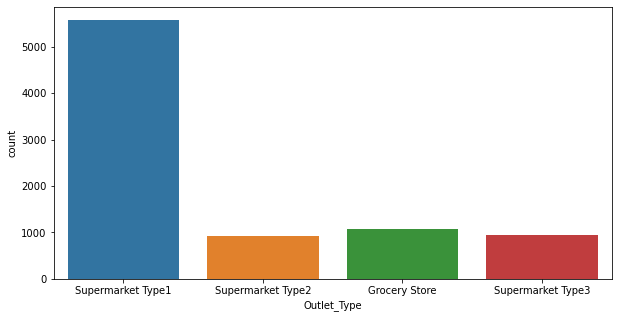

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Type'])
df['Outlet_Type'].value_counts()

There are 4 types of outlets, supermarket type1,supermarket type2,supermarket type3 and grocery store.In the dataset there were 5577 Type1 Supermarket,1083 Grocery stores,935 Supermarket Type3 and 928 Supermarket type2 outlets.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

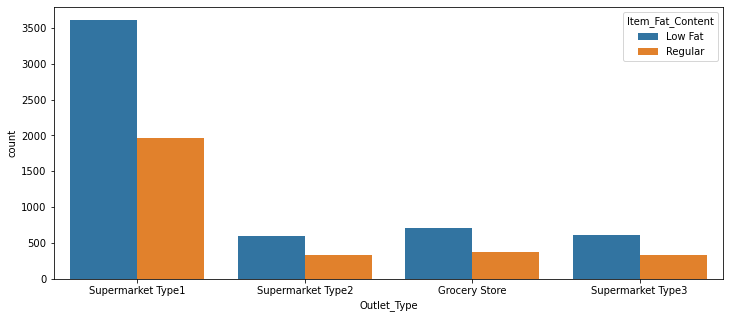

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x='Outlet_Type',hue='Item_Fat_Content',data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

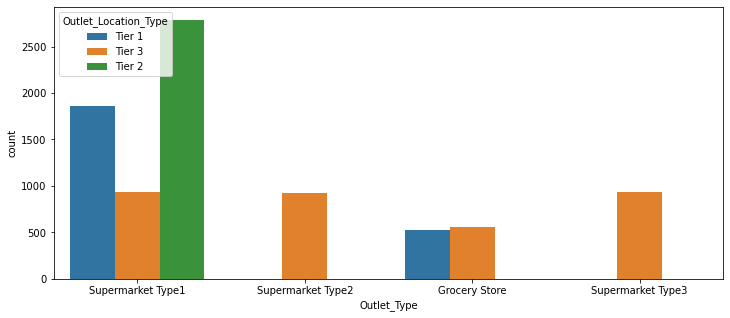

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x='Outlet_Type',hue='Outlet_Location_Type',data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

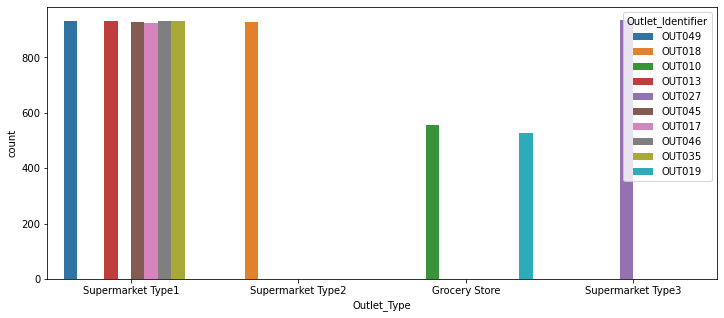

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x='Outlet_Type',hue='Outlet_Identifier',data=df)

In [23]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

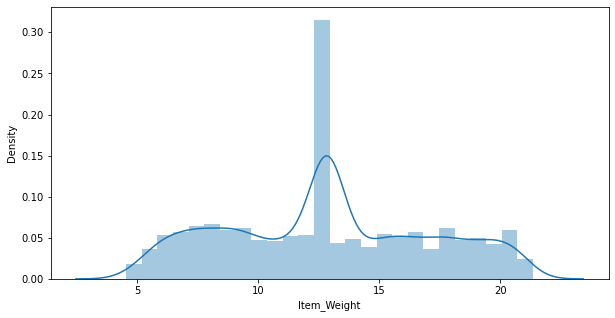

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Weight'])

Item weight is between 4 and 21.Item average weight is 12.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

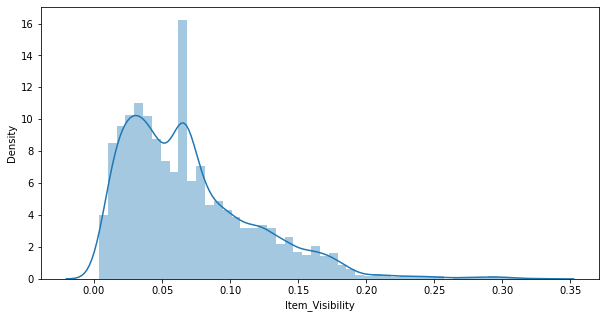

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Visibility'])

There is skewness in the Item Visibility, need to remove skewness.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

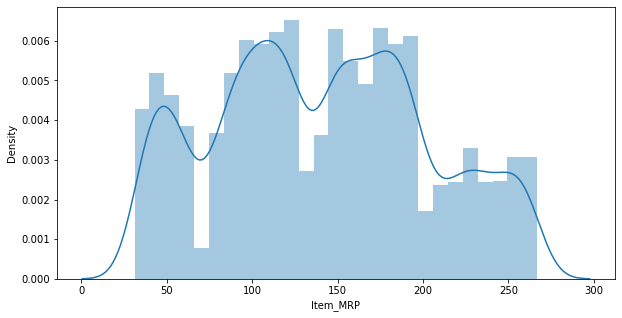

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_MRP'])

The Item MRP is between 31 and 266.The average item MRP is 140

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

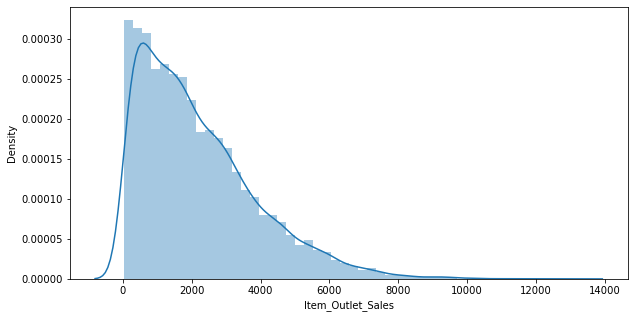

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Outlet_Sales'])

Right skewness is present in Item outlet sales.

In [28]:
#Skewness removing
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

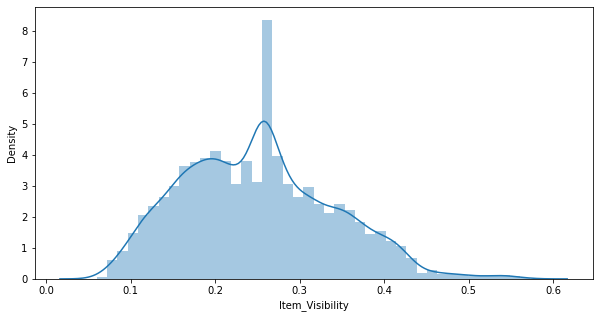

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Visibility'])

In [30]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [31]:
for i in columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

Checking outliers

<AxesSubplot:xlabel='Item_Weight'>

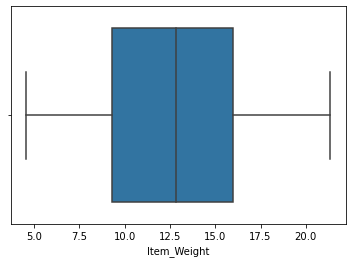

In [32]:
sns.boxplot(x=df['Item_Weight'])

No outliers are present in Item weight

<AxesSubplot:xlabel='Item_Visibility'>

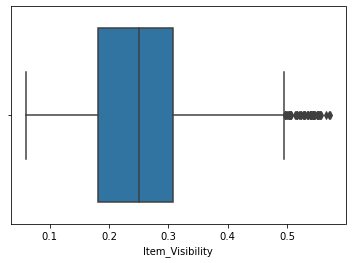

In [33]:
sns.boxplot(df['Item_Visibility'])

There are ouliers in Item visibility

<AxesSubplot:xlabel='Item_MRP'>

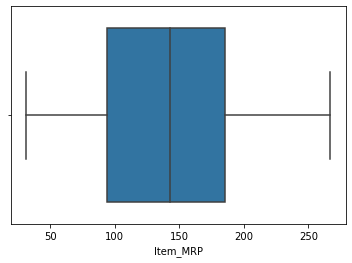

In [34]:
sns.boxplot(df['Item_MRP'])

No outliers in Item MRP

<AxesSubplot:xlabel='Item_Outlet_Sales'>

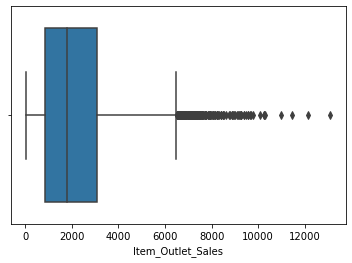

In [35]:
sns.boxplot(df['Item_Outlet_Sales'])

There are ouliers in Item outlet sales.

Removing outliers

In [36]:
#Finding out outliers
from scipy.stats import zscore

score=np.abs(zscore(df))
print(np.where(score>3))

(array([  83,  108,  130,  145,  174,  276,  304,  333,  373,  456,  472,
        521,  661,  694,  753,  809,  854,  935,  991,  997, 1009, 1138,
       1254, 1311, 1450, 1506, 1651, 1805, 1841, 1859, 1998, 2109, 2216,
       2238, 2251, 2293, 2516, 2535, 2586, 2613, 2776, 2855, 2895, 3083,
       3087, 3098, 3154, 3234, 3286, 3407, 3474, 3488, 3540, 3667, 3709,
       3720, 3750, 3757, 4006, 4289, 4346, 4349, 4382, 4530, 4674, 4676,
       4681, 4772, 4789, 4888, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5799,
       5812, 5880, 5977, 6000, 6134, 6334, 6409, 6537, 6541, 6576, 6606,
       6622, 6674, 6886, 6993, 7005, 7016, 7076, 7188, 7191, 7215, 7236,
       7250, 7256, 7302, 7343, 7388, 7499, 7560, 7562, 7603, 7609, 7690,
       7752, 7816, 7826, 7930, 7949, 8039, 8194, 8201, 8215, 8245, 8273,
       8447], dtype=int64), array([ 3,  3, 10, 10,  3, 10, 10, 10, 10, 10, 10,  3, 10, 10, 10, 10,  3,
       10, 10, 10, 1

In [37]:
#Removing outliers
dfnew=df[(score<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (8390, 11)


<AxesSubplot:xlabel='Item_Visibility'>

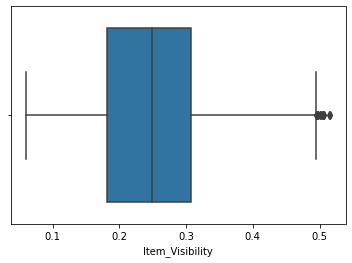

In [38]:
sns.boxplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

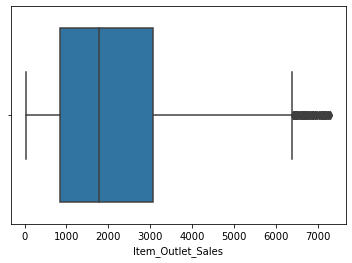

In [39]:
sns.boxplot(df['Item_Outlet_Sales'])

In [40]:
data_loss=(8523-8390)/8523*100
data_loss

1.5604833978646018

1.56% data loss after removing outliers

In [41]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000
mean,779.960787,12.855254,0.352801,0.248230,7.226222,140.117860,4.732420,1997.952324,1.108462,1.195232,2123.107087
std,449.839317,4.246807,0.477870,0.086918,4.211007,61.921467,2.844738,8.327949,0.811417,0.783381,1581.918460
min,0.000000,4.555000,0.000000,0.059789,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,33.290000
25%,394.250000,9.300000,0.000000,0.181475,4.000000,93.354100,2.000000,1987.000000,0.000000,1.000000,837.576400
50%,782.500000,12.857645,0.000000,0.249336,6.000000,142.014100,5.000000,1999.000000,1.000000,1.000000,1780.349200
75%,1168.000000,16.100000,1.000000,0.306916,10.000000,184.784500,7.000000,2004.000000,2.000000,1.000000,3063.512250
max,1558.000000,21.350000,1.000000,0.516136,15.000000,266.888400,9.000000,2009.000000,2.000000,3.000000,7298.499600


The all columns have 8390 rows.

In [42]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044442,-0.115517,-0.034461,-0.016908,0.013668,-0.008797,-0.012812,0.002442,-0.002337,0.005482
Item_Weight,0.044442,1.000000,-0.021363,-0.019392,0.029178,0.024527,-0.008210,-0.008554,0.004281,-0.000111,0.011908
Item_Fat_Content,-0.115517,-0.021363,1.000000,0.058375,-0.137230,0.006495,0.000968,0.003418,-0.002167,0.001309,0.020133
Item_Visibility,-0.034461,-0.019392,0.058375,1.000000,-0.042339,-0.000597,-0.083582,-0.055530,-0.017850,-0.138642,-0.105701
Item_Type,-0.016908,0.029178,-0.137230,-0.042339,1.000000,0.032447,0.001372,0.005814,0.002761,0.001389,0.016460
Item_MRP,0.013668,0.024527,0.006495,-0.000597,0.032447,1.000000,0.000821,0.018500,-0.006366,-0.021885,0.565445
Outlet_Identifier,-0.008797,-0.008210,0.000968,-0.083582,0.001372,0.000821,1.000000,0.080063,-0.721930,0.094480,0.169026
Outlet_Establishment_Year,-0.012812,-0.008554,0.003418,-0.055530,0.005814,0.018500,0.080063,1.000000,-0.084155,-0.108021,-0.017401
Outlet_Location_Type,0.002442,0.004281,-0.002167,-0.017850,0.002761,-0.006366,-0.721930,-0.084155,1.000000,0.462890,0.068154
Outlet_Type,-0.002337,-0.000111,0.001309,-0.138642,0.001389,-0.021885,0.094480,-0.108021,0.462890,1.000000,0.375396


<AxesSubplot:>

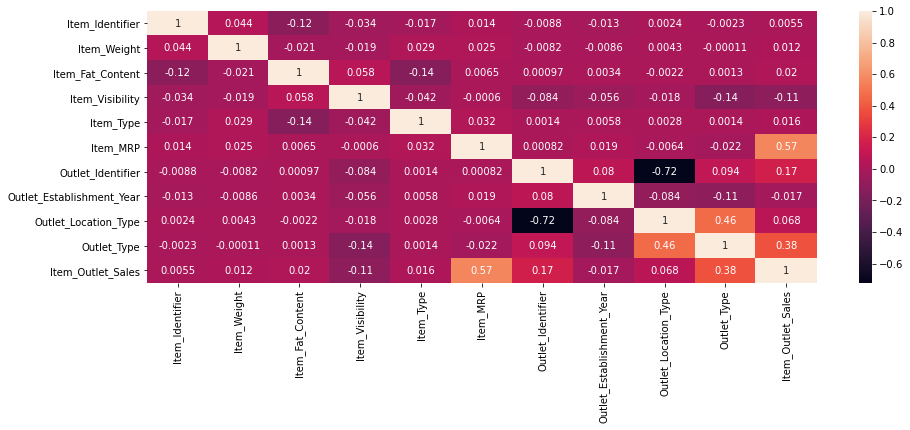

In [43]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

Label is positively correlated to item_MRP,Outlet_identifier,Outlet_Type,item_identifier,item_weight,item_fat_content,item_type and outlet_location_type. Negatively correlated to item_visibility,item_establishment_year.

In [44]:
#Testing data
Df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [45]:
Df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

null values in Item weight and Outlet_size.

In [46]:
#Removing outlet_size columnn and filling null value in Item_weight
Df=Df.drop('Outlet_Size',axis=1)
Df['Item_Weight']=Df['Item_Weight'].fillna(Df['Item_Weight'].mean())

In [47]:
Df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Tier 3,Supermarket Type3


In [48]:
Df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

No null value now.

In [49]:
Df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.016380,0.045257,0.013548
Item_Visibility,-0.016380,1.000000,-0.014013,-0.097040
Item_MRP,0.045257,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.013548,-0.097040,-0.007233,1.000000


In [50]:
column=Df.columns
column

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [51]:
#Label encoding
for i in column:
    if Df[i].dtypes=="object":
        Df[i]=le.fit_transform(Df[i].values.reshape(-1,1))

In [52]:
#Seperating the traning and testing data
x_train=df.drop('Item_Outlet_Sales',axis=1)
y_train=df['Item_Outlet_Sales']
x_test=Df

Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.4900875643016701

In [54]:
pred=lr.predict(x_test)
pred

array([2042.19213893, 1437.74060002, 2502.85919868, ..., 1979.08864569,
       3211.54291883, 1446.76069714])

Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [56]:
pred=dtr.predict(x_test)
pred

array([1693.7952, 2255.7304,  264.9884, ..., 3749.7856, 6911.004 ,
       1342.2528])

Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9365048666414884

In [58]:
pred=rfr.predict(x_test)
pred

array([1548.337874, 1604.870952,  599.799246, ..., 1699.048362,
       3718.113494, 1440.59146 ])

Cross validation

In [59]:
#Linear Regression
from sklearn.model_selection import cross_val_score

score=cross_val_score(lr,x_train,y_train,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.50396454 0.4943405  0.46954367 0.48798412 0.4850054 ]
0.48816764755592396
0.011353695381727804


In [60]:
#DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

score=cross_val_score(dtr,x_train,y_train,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.20155531 0.12346648 0.06430929 0.16251224 0.17468429]
0.14530552123920387
0.047666666865375525


In [61]:
#RandomForestRegressor
from sklearn.model_selection import cross_val_score

score=cross_val_score(rfr,x_train,y_train,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.5506384  0.51939798 0.51955814 0.55120835 0.54434137]
0.537028848787185
0.014531512041140192


Hyperparameter Tuning

In [62]:
#Decision tree
from sklearn.model_selection import GridSearchCV

grid_para={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,1)}
grid_search=GridSearchCV(estimator=dtr,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [63]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 13, 'splitter': 'random'}


In [68]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=7,min_samples_split=13,splitter='random')
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

0.5978830522189789

In [69]:
preddtr=dtr.predict(x_test)
preddtr

array([1751.51636111, 1461.59245944,  639.62717241, ..., 2060.38423165,
       3677.74983472, 1461.59245944])

In [65]:
#Random forest
grid_para={'n_estimators':[90,100,115,130],'criterion':['squared_error','absolute_error','poisson'],'max_depth':range(2,20,1),'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rfr,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [90, 100, 115, 130]})

In [66]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'poisson', 'max_depth': 19, 'max_features': 'auto', 'n_estimators': 130}


In [70]:
rfr=RandomForestRegressor(criterion='poisson',max_depth=19,max_features='auto',n_estimators=130)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.38017374025823214

In [71]:
predrfr=rfr.predict(x_test)
predrfr

array([3203.06185205, 3262.96866259, 4888.90820798, ..., 2232.38659926,
       3937.64157607, 1577.52505127])

Decision tree model is the best model with accuracy of 59.78%.

In [72]:
import pickle
filename="Big Data Mart Sales.pkl"
pickle.dump(dtr,open(filename, 'wb'))